# 07. Model Comparison

Aggregates results from all previously trained models and visualizes their performance.

Found 5 metric files: ['../results/metrics/logistic_regression/logistic_regression.json', '../results/metrics/xgboost/xgboost.json', '../results/metrics/transformer/transformer_metrics.json', '../results/metrics/gru/gru_metrics.json', '../results/metrics/lightgbm/lightgbm.json']


,model,accuracy,roc_auc,pr_auc,brier,best_params
0,Logistic Regression,0.650602,0.683636,0.769032,0.229313,NaN
1,XGBoost,0.638554,0.670909,0.771540,0.241611,NaN
2,Transformer,0.722892,0.715758,0.729572,0.207471,NaN
3,LSTM/GRU,0.686747,0.718788,0.766020,0.220019,NaN
4,LightGBM,0.734940,0.758788,0.794792,0.193033,"{'n_estimators': 165, 'max_depth': 4, 'learnin..."


 Saved comparison plot


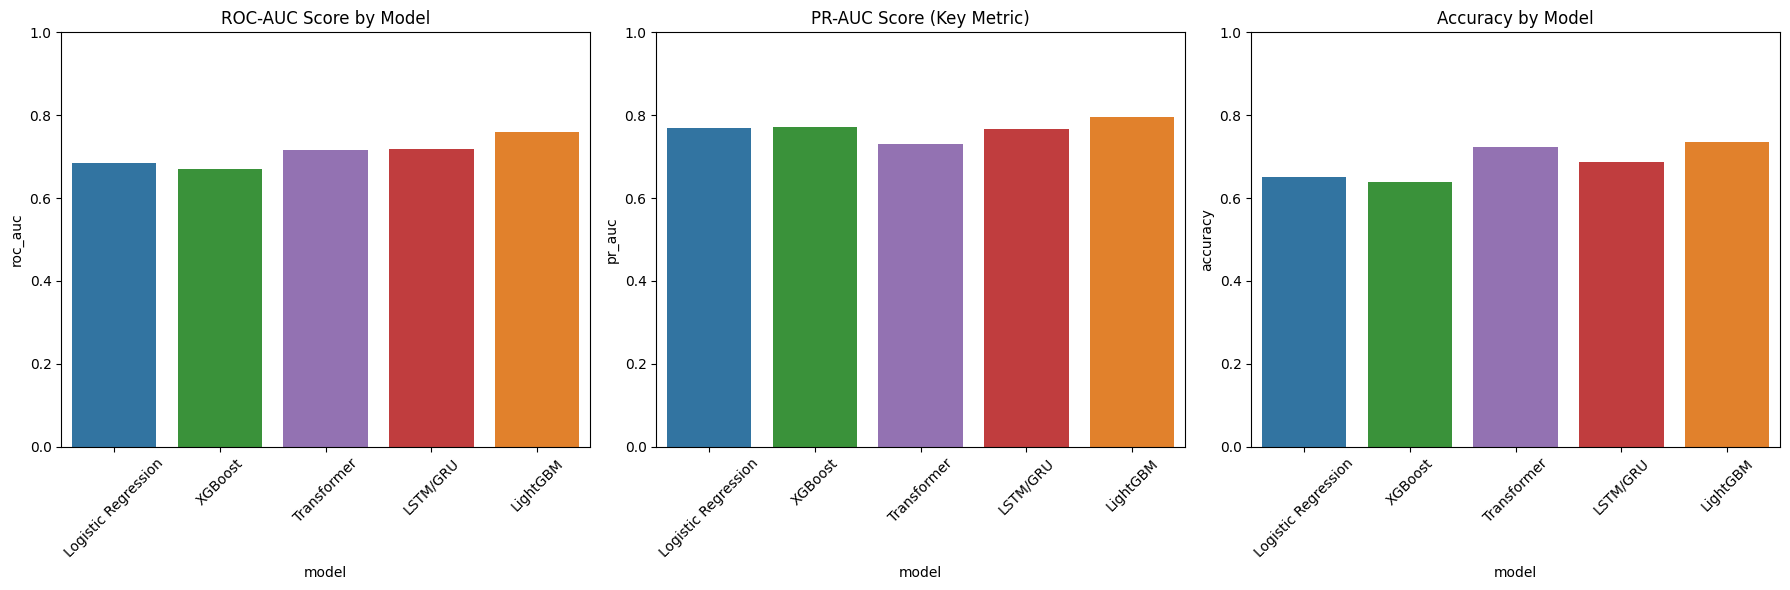

In [3]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob

import warnings
warnings.filterwarnings("ignore")


# Robustly find all json files in recursive subdirectories
metrics_dir = '../results/metrics'
metric_files = glob.glob(os.path.join(metrics_dir, '**/*.json'), recursive=True)

print(f"Found {len(metric_files)} metric files: {metric_files}")

results = []
for f in metric_files:
    try:
        with open(f, 'r') as file:
            results.append(json.load(file))
    except Exception as e:
        print(f"Error loading {f}: {e}")

if not results:
    print("Warning: No metrics loaded.")
    df_res = pd.DataFrame(columns=['model', 'roc_auc', 'pr_auc', 'accuracy'])
else:
    df_res = pd.DataFrame(results)

display(df_res)

# Consistent Colors
color_map = {
    'Logistic Regression': '#1f77b4', 
    'XGBoost': '#2ca02c',             
    'LightGBM': '#ff7f0e',            
    'LSTM/GRU': '#d62728',            
    'Transformer': '#9467bd'          
}

# Only proceed if we have data
if not df_res.empty and 'model' in df_res.columns:
    palette = [color_map.get(m, '#333333') for m in df_res['model']]

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # ROC-AUC
    if 'roc_auc' in df_res.columns:
        sns.barplot(data=df_res, x='model', y='roc_auc', palette=color_map, ax=axes[0])
        axes[0].set_title('ROC-AUC Score by Model')
        axes[0].set_ylim(0, 1.0)
        axes[0].tick_params(axis='x', rotation=45)

    # PR-AUC
    if 'pr_auc' in df_res.columns:
        sns.barplot(data=df_res, x='model', y='pr_auc', palette=color_map, ax=axes[1])
        axes[1].set_title('PR-AUC Score (Key Metric)')
        axes[1].set_ylim(0, 1.0)
        axes[1].tick_params(axis='x', rotation=45)

    # Accuracy
    if 'accuracy' in df_res.columns:
        sns.barplot(data=df_res, x='model', y='accuracy', palette=color_map, ax=axes[2])
        axes[2].set_title('Accuracy by Model')
        axes[2].set_ylim(0, 1.0)
        axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('../results/figures/comparison/model_comparison.png')
    print(' Saved comparison plot')
    plt.show()
else:
    print(" No valid data to plot.")

In [4]:
#